In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn import tree

In [14]:
df = pd.read_csv('diabetes.csv')

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

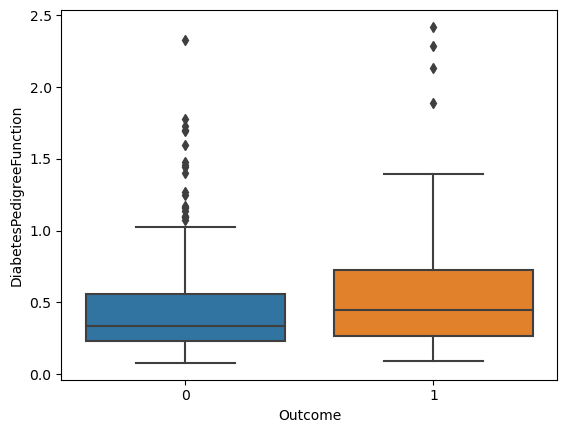

In [16]:
sns.boxplot(x=df['Outcome'], y=df['DiabetesPedigreeFunction'])

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
%matplotlib inline

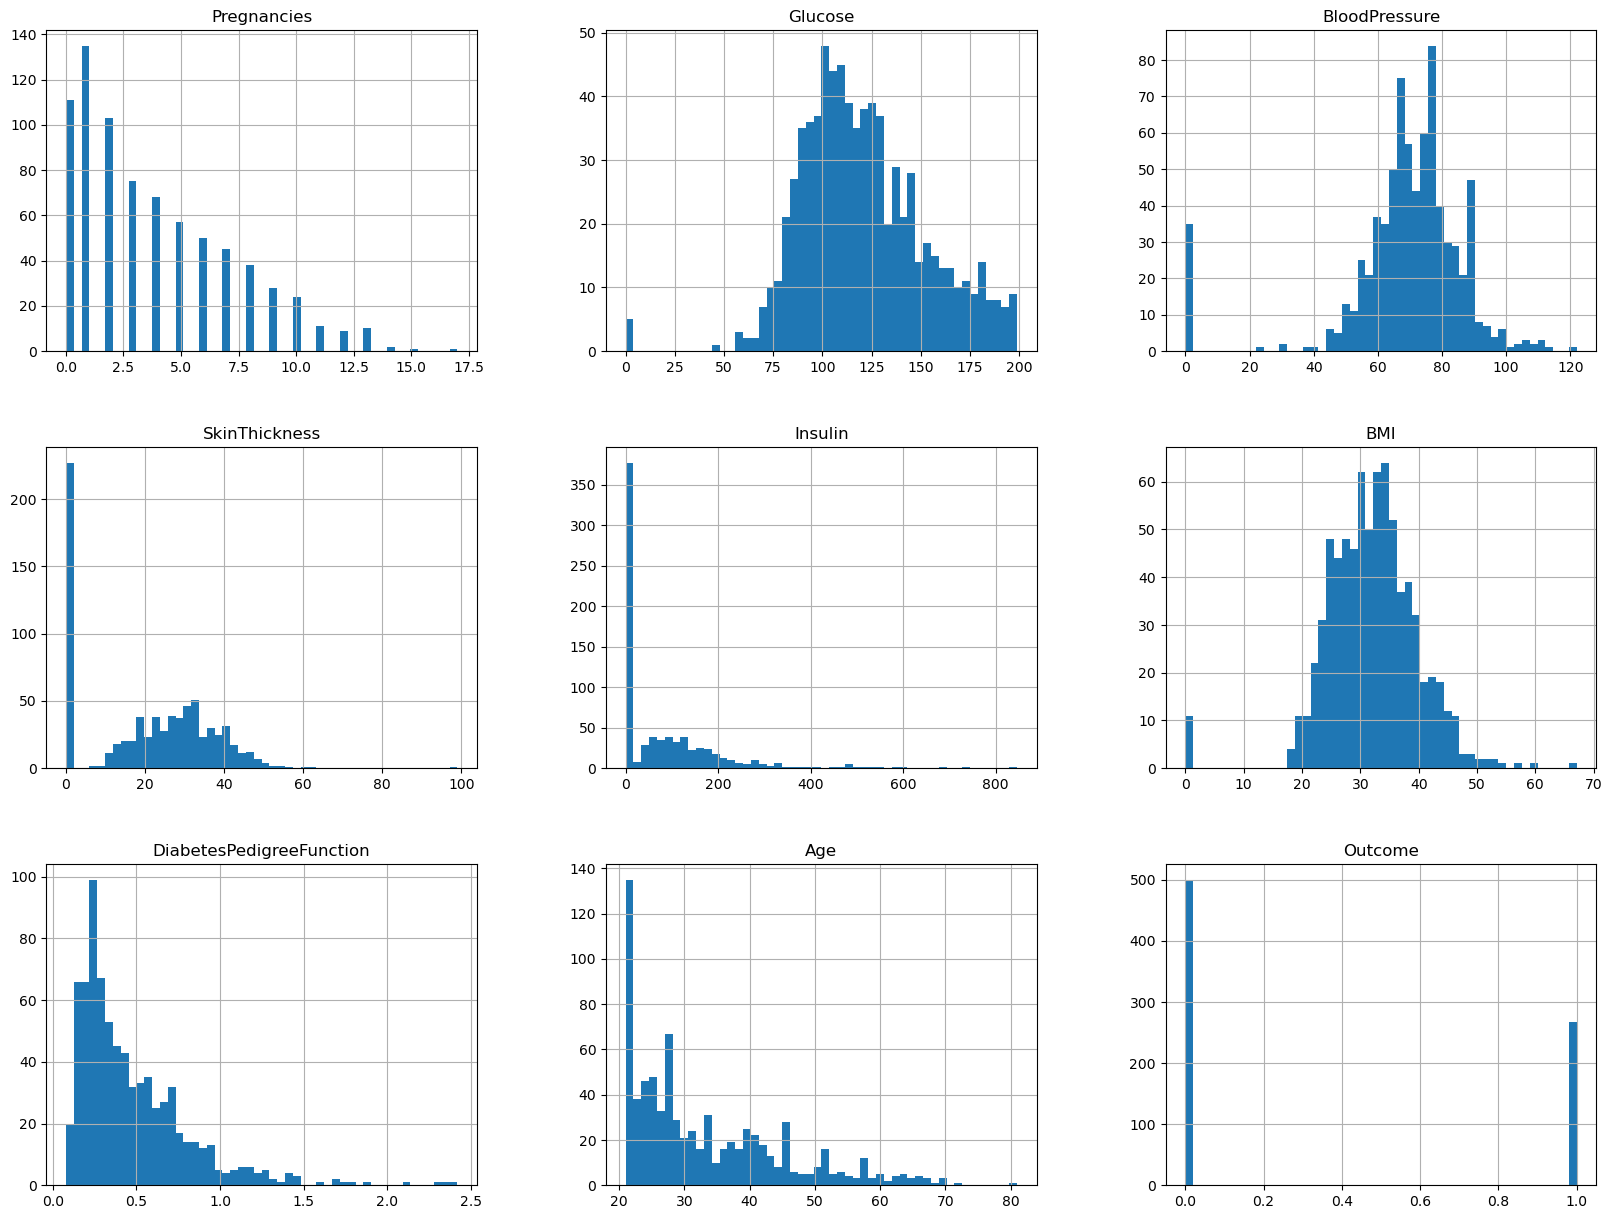

In [21]:
df.hist(bins=50,figsize=(20,15))
plt.show();

In [22]:
print("BMI range:", df["BMI"].min(), df["BMI"].max()) 
print("DiabetesPedigreeFunction range:", df.DiabetesPedigreeFunction.min(),df.DiabetesPedigreeFunction.max())
print("Age range:", df.Age.min(),df.Age.max() )

BMI range: 0.0 67.1
DiabetesPedigreeFunction range: 0.078 2.42
Age range: 21 81


In [23]:
def split_train_test(df,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(df))
    test_set_size = int(test_ratio * len(df))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return df.iloc[train_indices],df.iloc[test_indices]

train_set,test_set = split_train_test(df,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 615
Test set length: 153


In [24]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(df,test_size = 0.2,random_state = 42 )

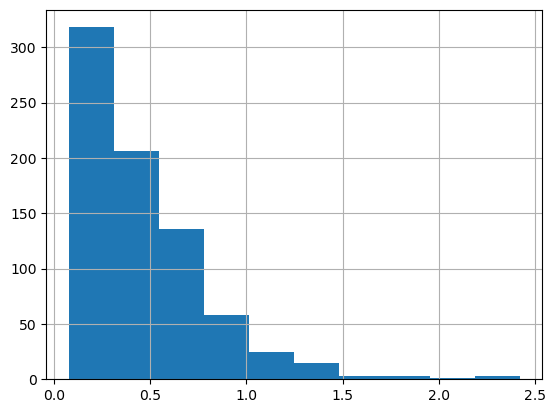

In [25]:
df['DiabetesPedigreeFunction'].hist();

In [26]:
df['DiabetesPedigreeFunction_category'] = pd.cut(df['DiabetesPedigreeFunction'],bins=[0.,1.5,3,4.5,6, np.inf],labels=[1,2,3,4,5])

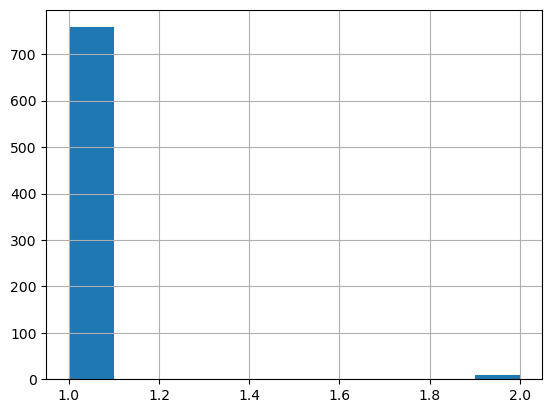

In [27]:
df.DiabetesPedigreeFunction_category.hist();

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(df,df['DiabetesPedigreeFunction_category']):
    print(train_index)
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

[764 753 760 130 338  59 218 411 454 450 593 455 452 115 324 210 699 316
 367 294 150  79 329 465 636 307 744 389 457 615 590 449 735 619 606 195
 526 515 702 214 614 763 426 538 726 383 158 557 537 176 731 451 472 739
 278 271 295 363 623 326 354 755 664 418 536 167 139  85 529 368 637 612
  78 505 403 754 111 541 520 674 527 320 289  76 387 638 436 327 229 116
 533 291 369 265 429 602 522 670 477 267 120 308 371 458 558 540 704 189
 732 227 543 566 551 586 716 328 508 200 440 304 402 138 348 447 686 697
 419 188 412 290 758 145 632 237 235 275 507 443 486  10 446 296 100  75
 737 708 311 351 331 375  93 243 199 584 336 225 701 205 400 705  38 279
   8 302 476 641 392 688 180 107 668 514 232 213 438 597 587 567 129 633
 238 659 251 453  37 118 494 394 427  44 323 712  82 749 415  86   4 146
 259   6 703 175 431 461 647 221 276 337 177 228 263 297  73 588 103 298
 665  91 677 143 350  43  68 257 550 207 196 555  97 575 253 433 161 132
 390 720 617 182 714 134 464 650 439 715 724 148 34

In [29]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("DiabetesPedigreeFunction_category",axis=1,inplace=True)

In [30]:
df = strat_train_set.copy()

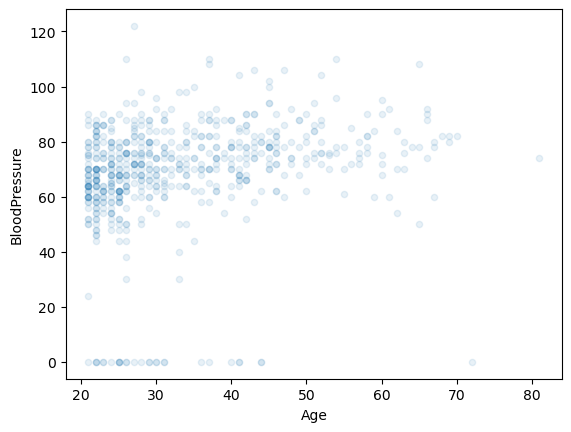

In [31]:
df.plot(kind='scatter', x='Age', y='BloodPressure', alpha = 0.1);

In [32]:
data.plot(kind='scatter',x='Glucose',y = 'BloodPressure',alpha = 0.1,s=df['Insulin']/100,label='Insulin',figsize=(10,7),c='DiabetesPedigreeFunction',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

NameError: name 'data' is not defined

In [33]:
import seaborn as sns

In [34]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
764,2,122,70,27,0,36.8,0.340,27,0
753,0,181,88,44,510,43.3,0.222,26,1
760,2,88,58,26,16,28.4,0.766,22,0
130,4,173,70,14,168,29.7,0.361,33,1
338,9,152,78,34,171,34.2,0.893,33,1
...,...,...,...,...,...,...,...,...,...
521,3,124,80,33,130,33.2,0.305,26,0
193,11,135,0,0,0,52.3,0.578,40,1
672,10,68,106,23,49,35.5,0.285,47,0
24,11,143,94,33,146,36.6,0.254,51,1


In [35]:
corr_matrix = df.corr()
corr_matrix['DiabetesPedigreeFunction'].sort_values(ascending=False)

DiabetesPedigreeFunction    1.000000
Outcome                     0.187298
SkinThickness               0.170387
Insulin                     0.148775
Glucose                     0.129268
BMI                         0.122039
Age                         0.033847
BloodPressure               0.024445
Pregnancies                -0.020668
Name: DiabetesPedigreeFunction, dtype: float64

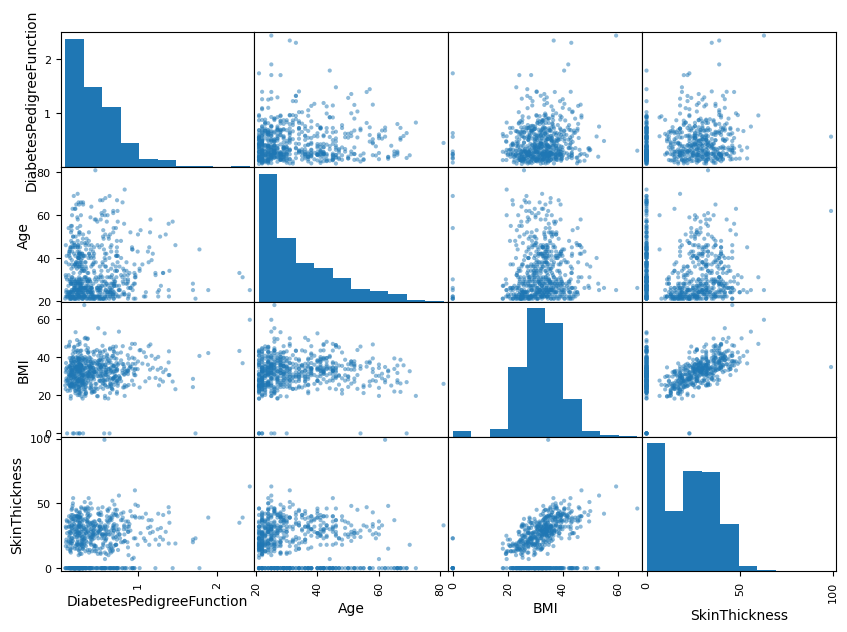

In [36]:
from pandas.plotting import scatter_matrix

attributes = ['DiabetesPedigreeFunction','Age','BMI','SkinThickness']
scatter_matrix(df[attributes],figsize=(10,7));

In [37]:
data.plot(kind='scatter',x='Age',y='DiabetesPedigreeFunction',alpha=0.1)

NameError: name 'data' is not defined

In [38]:
df['PregnanciesPerAge'] = df['Pregnancies'] / df['Age']
df['GlucosePerPregnancies'] = df['Glucose'] / df.Pregnancies
df['SkinThicknessPerAge'] = data['SkinThickness'] / df.Age

NameError: name 'data' is not defined

In [39]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PregnanciesPerAge,GlucosePerPregnancies
764,2,122,70,27,0,36.8,0.340,27,0,0.074074,61.000000
753,0,181,88,44,510,43.3,0.222,26,1,0.000000,inf
760,2,88,58,26,16,28.4,0.766,22,0,0.090909,44.000000
130,4,173,70,14,168,29.7,0.361,33,1,0.121212,43.250000
338,9,152,78,34,171,34.2,0.893,33,1,0.272727,16.888889
...,...,...,...,...,...,...,...,...,...,...,...
521,3,124,80,33,130,33.2,0.305,26,0,0.115385,41.333333
193,11,135,0,0,0,52.3,0.578,40,1,0.275000,12.272727
672,10,68,106,23,49,35.5,0.285,47,0,0.212766,6.800000
24,11,143,94,33,146,36.6,0.254,51,1,0.215686,13.000000


In [40]:
corr_matrix = df.corr()
corr_matrix['Age'].sort_values(ascending=False)

Age                         1.000000
Pregnancies                 0.515302
Glucose                     0.271718
Outcome                     0.249656
BloodPressure               0.235403
PregnanciesPerAge           0.225037
DiabetesPedigreeFunction    0.033847
BMI                         0.033373
Insulin                    -0.016798
SkinThickness              -0.120805
GlucosePerPregnancies      -0.320533
Name: Age, dtype: float64

In [41]:
needed_features = ['Glucose','PregnanciesPerAge','GlucosePerBloodPressure','BMI','Age','Insulin']

In [42]:
df = strat_train_set.drop('DiabetesPedigreeFunction',axis=1)
housing_labels = strat_train_set['DiabetesPedigreeFunction'].copy()

In [43]:
df.dropna(subset=['Pregnancies'])
df.drop('Pregnancies',axis = 1)
median = df['Pregnancies'].median()
df.Pregnancies.fillna(median,inplace=True)

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [45]:
df_num = df.drop('BMI',axis = 1)
imputer.fit(df_num)
imputer.statistics_ == df_num.median().values

array([ True,  True,  True,  True,  True,  True,  True])

In [46]:
X = imputer.transform(df_num)

In [47]:
df_tranformed = pd.DataFrame(X, columns=df_num.columns,index=df_num.index)
df_tranformed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age,Outcome
764,2.0,122.0,70.0,27.0,0.0,27.0,0.0
753,0.0,181.0,88.0,44.0,510.0,26.0,1.0
760,2.0,88.0,58.0,26.0,16.0,22.0,0.0
130,4.0,173.0,70.0,14.0,168.0,33.0,1.0
338,9.0,152.0,78.0,34.0,171.0,33.0,1.0
...,...,...,...,...,...,...,...
521,3.0,124.0,80.0,33.0,130.0,26.0,0.0
193,11.0,135.0,0.0,0.0,0.0,40.0,1.0
672,10.0,68.0,106.0,23.0,49.0,47.0,0.0
24,11.0,143.0,94.0,33.0,146.0,51.0,1.0


In [48]:
df_category = df[['Outcome']]
df_category

,Outcome
764,0
753,1
760,0
130,1
338,1
...,...
521,0
193,1
672,0
24,1


In [49]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [50]:
category_encoded = ordinal_encoder.fit_transform(df_category)
category_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [51]:
ordinal_encoder.categories_

[array([0, 1], dtype=int64)]

In [52]:
from sklearn.preprocessing import OneHotEncoder
onehotEnconder = OneHotEncoder()
df_category_one_hot = onehotEnconder.fit_transform(df_category)
df_category_one_hot.toarray()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [53]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
SkinThickness_ix,Glucose_ix,Age_idx,Pregnancies_ix = 3,4,5,6

class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_GlucosePerPregnancies = False):
        self.add_GlucosePerPregnancies =add_GlucosePerPregnancies

    def fit(self,X,y = None):
        return self

    def transform(self,X,y=None):
        PregnanciesPerAge = X[:,Pregnancies_ix] / X[:,Age_idx]
        SkinThicknessPerAge = X[:, SkinThickness_ix] / X[:,Age_idx]
        if self.add_GlucosePerPregnancies:
            GlucosePerPregnancies = X[:, Glucose_ix] / X[:, Pregnancies_ix]
            return np.c_[X,PregnanciesPerAge,SkinThicknessPerAge]
        else:
            return np.c_[X,PregnanciesPerAge,SkinThicknessPerAge]

In [59]:
additive_transformer = CombinedAttributeAdder(add_GlucosePerPregnancies = False)
df_extra_attributes = additive_transformer.transform(df.values)

In [60]:
df_extra_attributes

array([[  2.        , 122.        ,  70.        , ...,   0.        ,
          0.73369565,   0.73369565],
       [  0.        , 181.        ,  88.        , ...,   1.        ,
          0.60046189,   1.01616628],
       [  2.        ,  88.        ,  58.        , ...,   0.        ,
          0.77464789,   0.91549296],
       ...,
       [ 10.        ,  68.        , 106.        , ...,   0.        ,
          1.32394366,   0.64788732],
       [ 11.        , 143.        ,  94.        , ...,   1.        ,
          1.39344262,   0.90163934],
       [  8.        , 196.        ,  76.        , ...,   1.        ,
          1.52      ,   0.77333333]])

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])

df_num_transformed = pipeline.fit_transform(df_num)

In [64]:
df_num_transformed

array([[-0.5409901 ,  0.03313985,  0.0450955 , ..., -0.7552036 ,
        -0.70942686,  0.50221392],
       [-1.14935625,  1.89730779,  0.96126361, ...,  1.32414623,
         1.86597055,  1.7130205 ],
       [-0.5409901 , -1.04112642, -0.56568324, ..., -0.7552036 ,
        -0.70942686,  0.82020353],
       ...,
       [ 1.89247451, -1.67304775,  1.87743172, ..., -0.7552036 ,
        -0.70942686, -0.39086327],
       [ 2.19665759,  0.69665725,  1.26665298, ...,  1.32414623,
         0.60352084, -0.11506002],
       [ 1.28410836,  2.37124879,  0.35048487, ...,  1.32414623,
         0.46531582, -0.3569159 ]])

In [69]:
from sklearn.compose import ColumnTransformer
num_attributes = list(df_num)
cat_attributes = ['Age']

full_pipeline = ColumnTransformer([
    ("num", pipeline,num_attributes),
    ("cat", OneHotEncoder(),cat_attributes)
])


df_prepared = full_pipeline.fit_transform(df)